##### Import Library

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os

In [22]:
df = pd.read_csv('dataset/diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

# Review dataset statistic
df.describe


<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0             35     30.5  33.6   
1              1     85.0           66.0             29     30.5  26.6   
2              8    183.0           64.0             23     30.5  23.3   
3              1     89.0           66.0             23     94.0  28.1   
4              0    137.0           40.0             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0             48    180.0  32.9   
764            2    122.0           70.0             27     30.5  36.8   
765            5    121.0           72.0             23    112.0  26.2   
766            1    126.0           60.0             23     30.5  30.1   
767            1     93.0           70.0             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

##### Analisis Data

<Axes: >

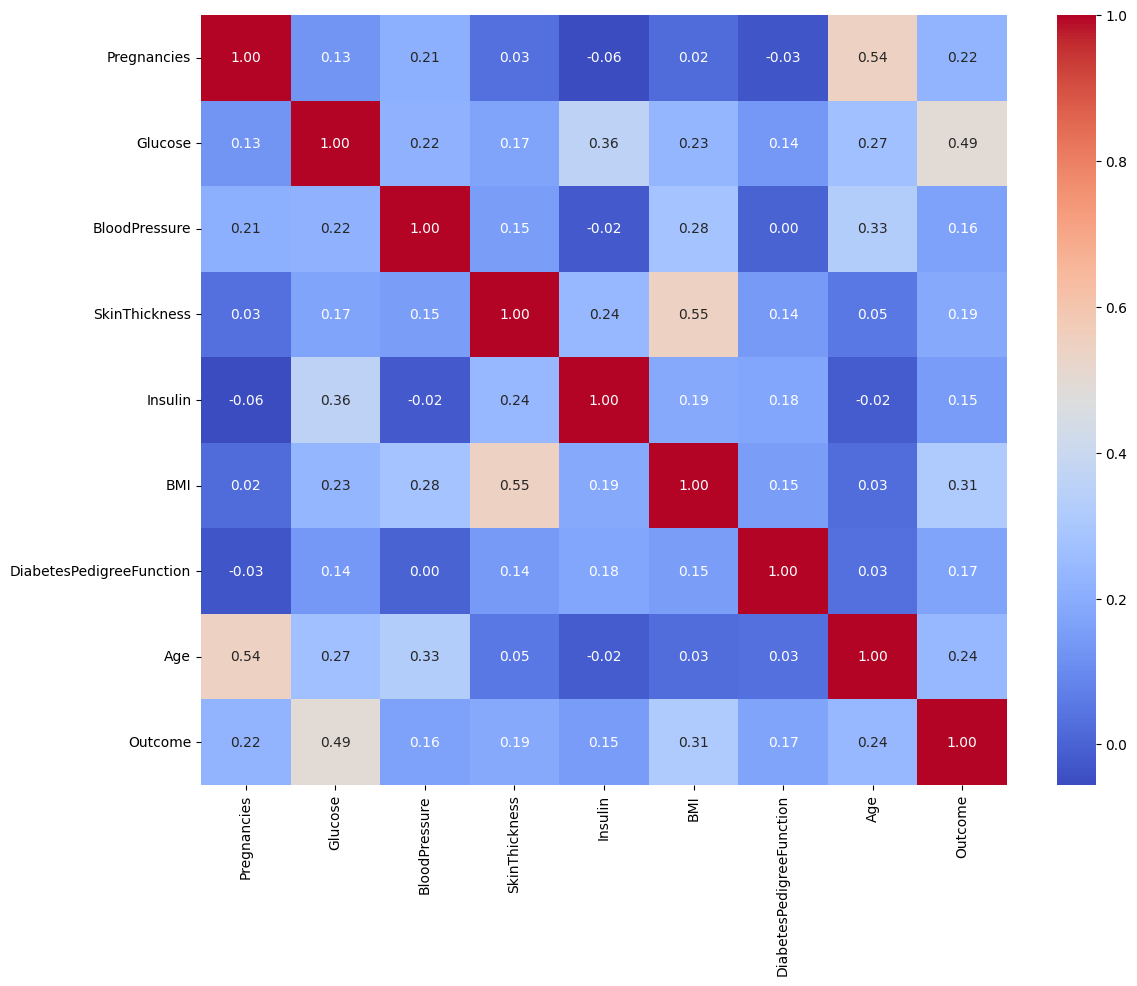

In [26]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

C:\Users\muhamad agus faisal\AppData\Local\Temp\ipykernel_10548\3006297417.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1],
C:\Users\muhamad agus faisal\AppData\Local\Temp\ipykernel_10548\3006297417.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0],


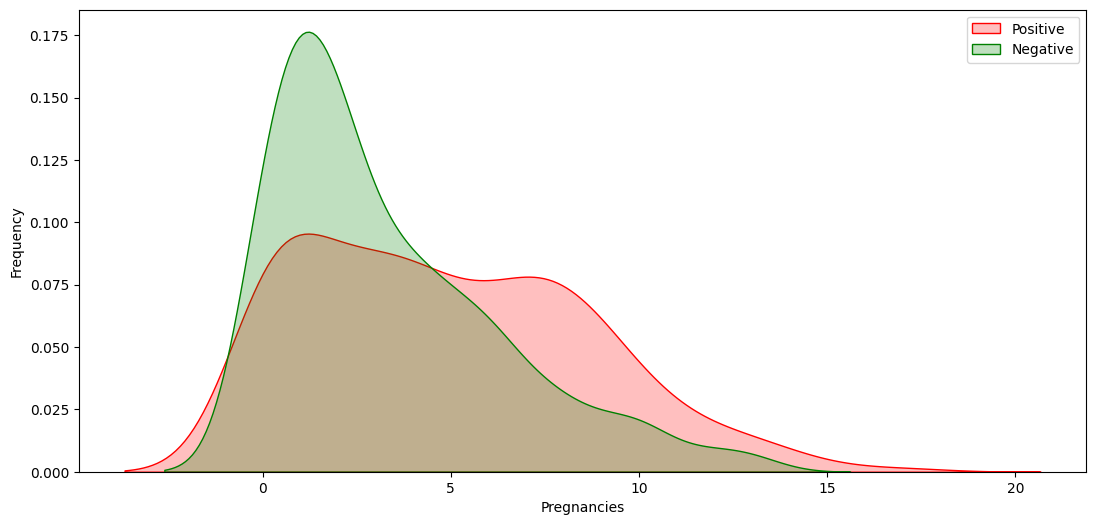

In [27]:
# Explore Pregnancies vs Outcome
plt.figure(figsize=(13, 6))
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1], 
    color = "Red", shade=True)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0],
    ax = g, color="Green", shade=True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive", "Negative"])

<Axes: xlabel='Outcome', ylabel='Glucose'>

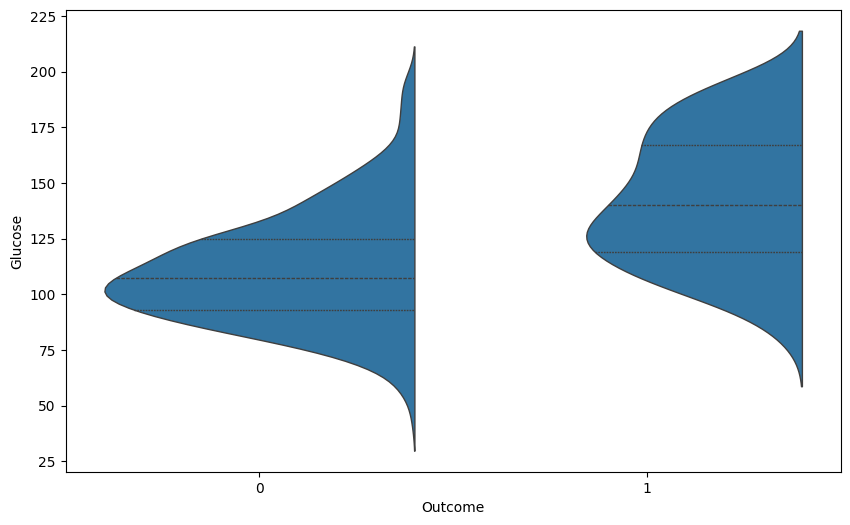

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Outcome", y="Glucose", 
               split=True, inner="quart", linewidth=1)

C:\Users\muhamad agus faisal\AppData\Local\Temp\ipykernel_10548\2010751252.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Glucose"][df["Outcome"] == 1], color="Red", shade=True)
C:\Users\muhamad agus faisal\AppData\Local\Temp\ipykernel_10548\2010751252.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g = sns.kdeplot(df["Glucose"][df["Outcome"] == 0], ax=g, color="Green", shade=True)


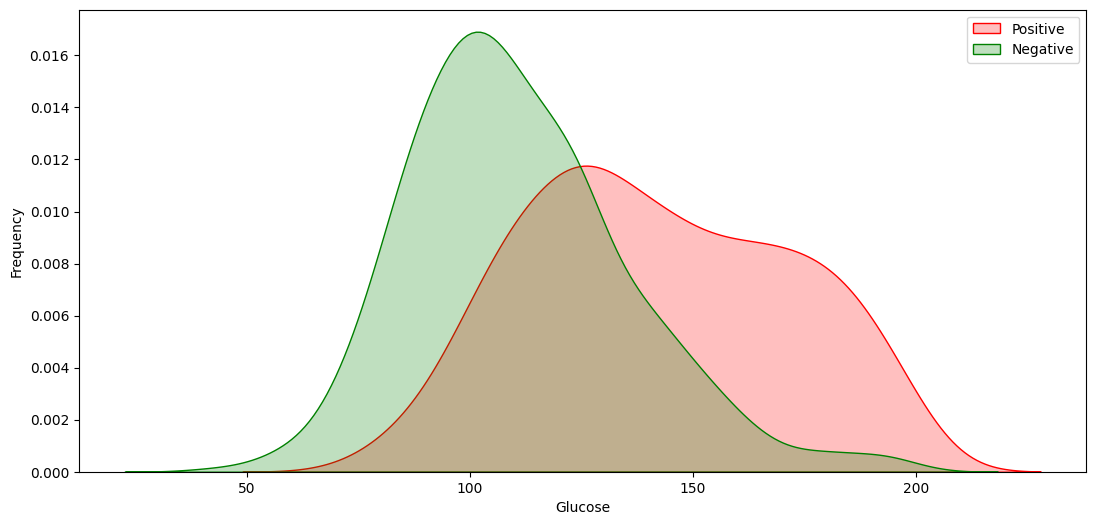

In [29]:
plt.figure(figsize=(13, 6))
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 1], color="Red", shade=True)
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 0], ax=g, color="Green", shade=True)
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive", "Negative"])

<Axes: xlabel='Glucose', ylabel='BMI'>

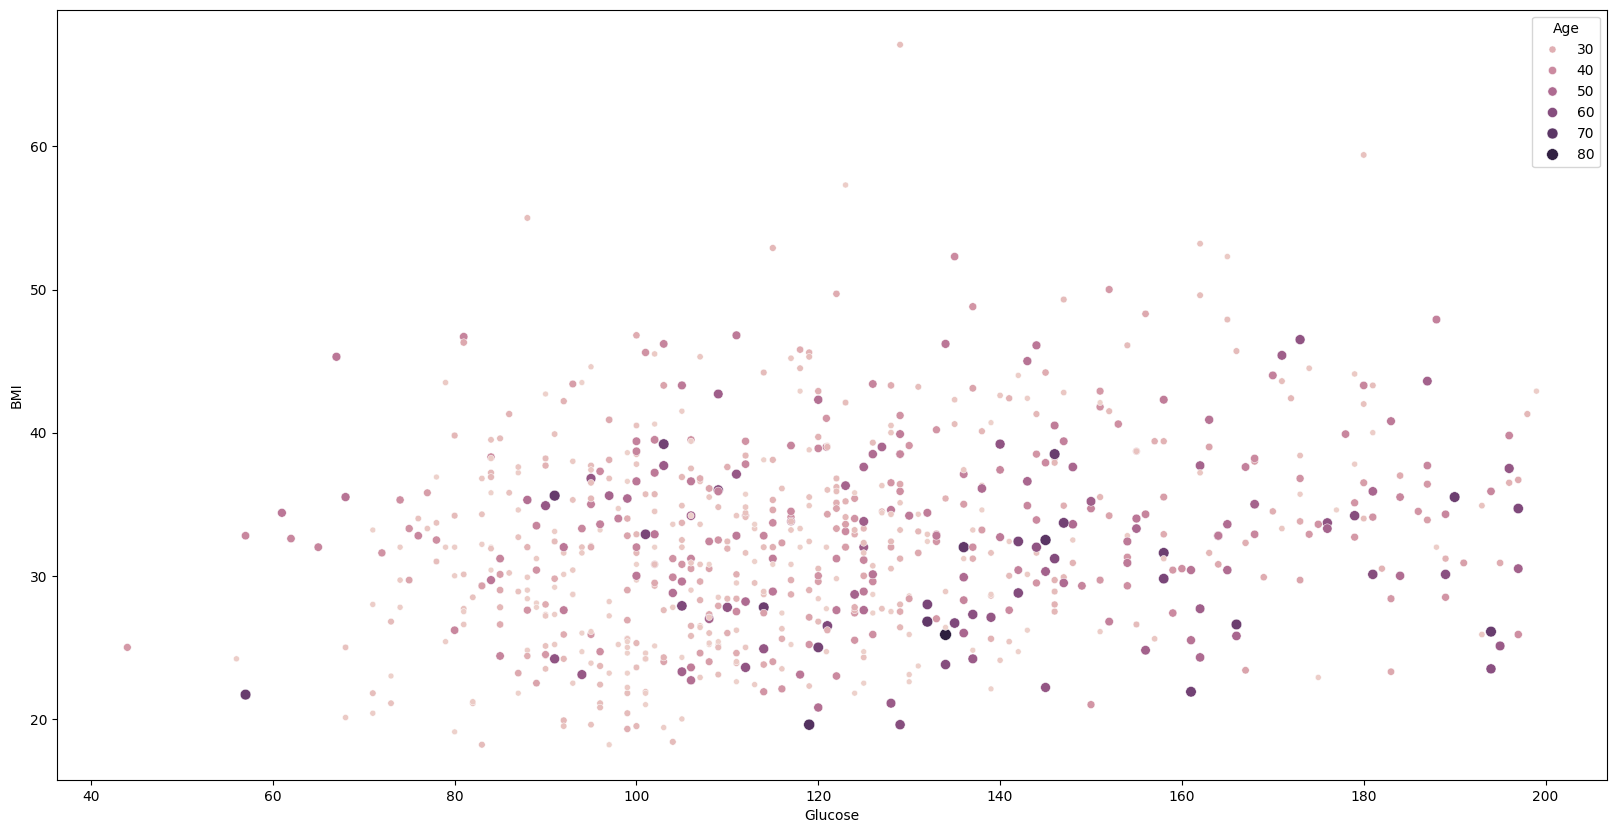

In [30]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Age", size="Age")

##### Data Preprocessing

In [31]:
def detect_outliers(df, n, features):
    outlier_indices = []
    """
    Detect outliers from given list of features. It returns a list of the indices according to the observations containing more than n outliers according to the Tukey metode
    """
    
    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR
        
        # detemine a list of indices of outlies for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    return multiple_outliers

# detect ourliers from numeric features
outliers_to_drop = detect_outliers(df, 2, ["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "SkinThickness", "Insulin", "Age"])

In [32]:
def detect_outliers(df, n, features):
    outlier_indices = []

    """
    Detect outliers from given list of features. It returns a list of the indices according to the observations containing more than n outliers according to the Tukey method
    """
    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        # append the found indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

        # select observations containing more than 2 outliers
        outlier_indices = Counter(outlier_indices)
        multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        return multiple_outliers
    
        # detect outliers from numeric features
    outliers_to_drop = detect_outliers(df, 2, ["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "SkinThicness", "Insulin", "Age"])

In [33]:
df.drop(df.loc[outliers_to_drop].index, inplace=True)